In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torch.utils.data import DataLoader
from poc_data import PocDataset, display_sample


NUM_CASES = 2**2

poc_raw_dataset = PocDataset(num_cases=NUM_CASES, generate_meta=True, test_set=True, repays=False)
data_loader = DataLoader(dataset=poc_raw_dataset,
                        batch_size=NUM_CASES,
                        shuffle=False,
                        pin_memory=True)

all_data, all_data_length, all_event, all_meta = next(iter(data_loader))

In [3]:
print(all_data.shape)
print(all_data_length.shape)
print(all_event.shape)

torch.Size([4, 36, 5])
torch.Size([4, 1])
torch.Size([4, 1])


In [4]:
from losses import loss_1_batch, loss_2_batch, loss_3_batch

input_size = 5
output_size = input_size
MAX_LENGTH = 36
NUM_CAUSES = 2
hidden_size_encoder = 512
hidden_size_attention = 512
fc_size_encoder = 512
SIGMA = 1

LOSS_1_AMPLIFIER = 1
LOSS_2_AMPLIFIER = 1
LOSS_3_AMPLIFIER = 0.1

DEVICE = 'cpu'

In [5]:
## Sanity check on only events
# BATCH_LENGTH = 2

# first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*2)
# first_hitting_time_batch[0,15] = 1
# first_hitting_time_batch[0,10] = 0
# first_hitting_time_batch[1,20] = 1
# first_hitting_time_batch[1,10] = 0

# batch_event = torch.zeros(BATCH_LENGTH, 1)
# batch_event[0] = 0
# batch_event[1] = 0

# batch_data_length = torch.zeros(BATCH_LENGTH, 1)
# batch_data_length[0] = 15
# batch_data_length[1] = 20

In [ ]:
## Check including censoring events
BATCH_LENGTH = 2

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*2)
first_hitting_time_batch[0,15] = 1
first_hitting_time_batch[0,10] = 0
first_hitting_time_batch[1,20] = 1
first_hitting_time_batch[1,10] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 2
batch_event[1] = 2

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 36
batch_data_length[1] = 36

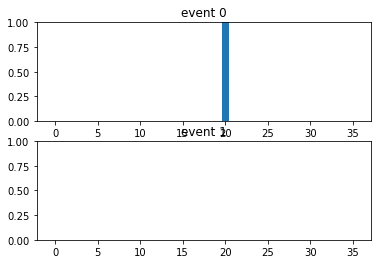

In [6]:
first_hitting_time = first_hitting_time_batch[1]

fig, (ax1, ax2) = plt.subplots(2)
ax1.bar([i for i in range(MAX_LENGTH)], first_hitting_time[:MAX_LENGTH].cpu().detach().numpy())
ax2.bar([i for i in range(MAX_LENGTH)], first_hitting_time[MAX_LENGTH:].cpu().detach().numpy())
ax1.set_title("event 0")
ax2.set_title("event 1")
ax1.set_ylim([0,1]);
ax2.set_ylim([0,1]);

In [12]:
loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor(0.)


In [13]:
loss2 = LOSS_2_AMPLIFIER*loss_2_batch(first_hitting_time_batch, batch_event, batch_data_length, NUM_CAUSES, MAX_LENGTH, SIGMA, DEVICE)
print("loss2=", loss2)

we've found something that doesn't follow concordance
loss2= tensor([2.2700e-05])


In [9]:
#loss3 = LOSS_3_AMPLIFIER*loss_3_batch(output_batch, batch_data.detach())
#print("loss3=", loss3)